<a href="https://colab.research.google.com/github/Aditya-11/High_Speed_Solver/blob/main/BenchMarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bench Marking of Matrix Multiplication on CPU , GPU and Google TPUs

Tesla K80 available in Google Colab delivers respectable 1.87 TFlops and 12GB RAM

TPUv2 available from within Google Colab comes with a whopping 180 TFlops and 64 GB High Bandwidth Memory (HBM)


In [ ]:
 %%writefile test.cpp

 // 2 random value , x , y
 // 1 x
 
 # include <iostream>
 #include <bits/stdc++.h>
 
 int main(int Argc,char* Args[]){
  std::cout << "test working !" << std::endl ;
  return 0;
}

Overwriting test.cpp


In [ ]:
  !nvcc --version 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
%%script bash

g++ test.cpp -o test
ls -laX
./test

total 32
drwxr-xr-x 1 root root  4096 Jan  6 18:10 sample_data
-rwxr-xr-x 1 root root 11544 Jan  9 16:44 test
drwxr-xr-x 1 root root  4096 Jan  9 16:44 .
drwxr-xr-x 1 root root  4096 Jan  9 16:23 ..
drwxr-xr-x 1 root root  4096 Jan  6 18:10 .config
-rw-r--r-- 1 root root   173 Jan  9 16:43 test.cpp
test working !


In [ ]:
# matrix multiplication using tensorflow on CPU

import tensorflow as tf 
import numpy as np 
import time 
import datetime

#a = tf.constant(np.random.rand(10000, 10000))
#b = tf.constant(np.random.rand(10000, 1))

a = tf.constant(np.ones((10000, 10000)))
b = tf.constant(np.ones((10000, 10000)))

with tf.device('/CPU:0'):
    time_s = datetime.datetime.now()
    c = tf.matmul(a, b)
    time_end = datetime.datetime.now()
    time_delta = time_end - time_s
    print ("time diff in cpu : " , time_delta)


time diff in cpu :  0:01:07.552017


In [ ]:
# Took GPU Resource 

#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

from tensorflow.python.client import device_lib
print (device_lib.list_local_devices()) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5497309870604047426
]


In [ ]:
# matrix multiplication using tensorflow on GPU

import tensorflow as tf 
import numpy as np 
import time 
import datetime

a = tf.constant(np.random.rand(10000, 10000))
b = tf.constant(np.random.rand(10000, 1))

with tf.device('/GPU:0'):
    time_s = datetime.datetime.now()
    c = tf.matmul(a, b)
    time_end = datetime.datetime.now()
    time_delta = time_end - time_s
    print ("time diff in gpu : " , time_delta)

time diff in gpu :  0:00:01.657926


In [ ]:
import tensorflow as tf
import os
# TPU Initialization

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Initializing the TPU system: grpc://10.95.81.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.95.81.154:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]


In [ ]:
import tensorflow as tf

In [ ]:
# took TPU resource
print("Num TPUs Available: ", len(tf.config.experimental.list_physical_devices('TPU')))

from tensorflow.python.client import device_lib
print (device_lib.list_local_devices()) 

Num TPUs Available:  0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6197948318374526285
]


In [ ]:
# matrix multiplicationn using tensorflow on TPU

import tensorflow as tf 
import numpy as np 
import time 
import datetime

#a = tf.constant(np.random.rand(10000, 10000))
#b = tf.constant(np.random.rand(10000, 1))

a = tf.constant(np.ones((15000, 15000)))
b = tf.constant(np.ones((15000, 15000)))

with tf.device('/TPU:0'):
    time_s = datetime.datetime.now()
    c = tf.matmul(a, b)
    time_end = datetime.datetime.now()
    time_delta = time_end - time_s
    print ("time diff in TPU : " , time_delta)

time diff in TPU :  0:00:00.000290


   
   N x N and N x 1 product            time (seconds) 

   1000                            0.000296

   10000                           00.000527

   20000                           00.275513

   30000                           00.6298  

   31000                           00.7554   

In [ ]:
0.000527

0.000296

0.000409 -> 15000

0.000266 -> 10000



 Testing result of product of 2 10000 * 10000 matrix in CPU, GPU ,TPU using  tensorflow library :

CPU time : 1 minute and 4.730764 second

GPU time : 1.830638 second

TPU time : 0.000247 second


In [ ]:
import time
import tensorflow as tf 
import numpy as np 

start = time.process_time() 
N = 10000
a = tf.constant(np.ones((N,N )))
b = tf.constant(np.ones((N ,N)))

with tf.device('/TPU:0'):
    start = time.process_time() 
    c = tf.matmul(a, b)
    print(time.process_time() - start)

0.0003225869999994302


n = 10000 : 0.0002187559999988764

n = 15000 : 0.00026719800000307714

n = 5000  : 0.00029179399999890165

n = 1000  : 0.0002640260000035255 

n = 16000 : 0.0002961739999989277

n = 14500 : 0.00027425399999980726

n = 8500  : 0.00027358799999888106




In [ ]:
import time
import tensorflow as tf 
import numpy as np 

start = time.process_time() 

a = tf.constant(np.ones((20000, 20000)))
b = tf.constant(np.ones((20000, 20000)))

with tf.device('/CPU'):
    start = time.process_time() 
    c = tf.matmul(a, b)
    print(time.process_time() - start)

830.412971635


n = 8500  : 0.0487789740000002

n = 5000  : 0.016660796999999672

n = 15000 : 0.1489128820000003

n = 16000 : 0.17133252399999943  

n = 10000 : 0.0665604170000007 

n = 14500 : 0.14073347799999958

n = 1000  : 0.0012795159999994254


In [ ]:
import time
import tensorflow as tf 
import numpy as np 

start = time.process_time() 

a = tf.constant(np.ones((16000, 16000)))
b = tf.constant(np.ones((16000, 16000)))

with tf.device('/device:GPU:0'):
    start = time.process_time() 
    c = tf.matmul(a, b)
    print(time.process_time() - start)

0.8619994559999782



n = 8500  : 0.12470823499999995

n = 5000  : 0.04467092500000014

n = 15000 : 0.3822102489999999

n = 16000 : 0.4367095560000003

n = 10000 : 0.17113139400000055

n = 14500 : 0.35358578299999976

n = 1000  : 0.0025060650000003903


In [ ]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices()) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 20440798564142032
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11927426254611375312
physical_device_desc: "device: XLA_CPU device"
]


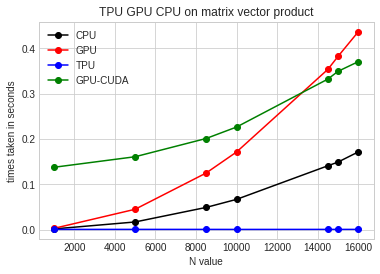

In [ ]:
import matplotlib.pyplot as plt

cpu_time = [0.0012795159999994254  ,  0.016660796999999672 , 0.0487789740000002 , 0.0665604170000007  ,  0.14073347799999958 , 0.1489128820000003 , 0.17133252399999943 ]

gpu_time = [0.0025060650000003903 , 0.04467092500000014 , 0.12470823499999995 , 0.17113139400000055  , 0.35358578299999976 , 0.3822102489999999 , 0.4367095560000003 ]

tpu_time = [0.0002640260000035255 , 0.00029179399999890165 , 0.00027358799999888106 , 0.0002187559999988764 ,   0.00027425399999980726 , 0.00026719800000307714 , 0.0002961739999989277 ] 

gpu_cuda = [ 0.13741 , 0.160686 , 0.200975 , 0.226264 , 0.332136 , 0.349282 , 0.37066 ]

times = [1000 , 5000 , 8500 , 10000 , 14500 , 15000 , 16000]

plt.style.use('seaborn-whitegrid')

import numpy as np

plt.plot(times , cpu_time , '-ok', color='black' , label = 'CPU');

plt.plot(times,gpu_time ,'-ok' , color = 'red' , label = 'GPU')

plt.plot(times ,tpu_time ,'-ok' ,  color = 'blue' , label = 'TPU')

plt.plot(times ,gpu_cuda ,'-ok' ,  color = 'green' , label = 'GPU-CUDA')



plt.xlabel('N value') 
plt.ylabel('times taken in seconds')
plt.title('TPU GPU CPU on matrix vector product')

plt.legend()



tpu_time = [ ]



using cuda implementation : 




1000  : 0.13741

5000  : 0.160686

8500  : 0.200975

10000 : 0.236703

14500 : 0.241894

15000 : 0.241294

16000 : 0.252805



In [ ]:
import time
import tensorflow as tf 
import numpy as np 

start = time.process_time() 

#a = tf.constant(np.ones((20000, 20000)))
#b = tf.constant(np.ones((20000, 20000)))

n_ = [1000 , 5000 , 8500 , 10000 , 14500 , 15000,16000]

time_ = []

with tf.device('/CPU'):
    for i in n_:
        a = tf.constant(np.ones((i , i)))
        b = tf.constant(np.ones((i , i)))
        start = time.process_time() 
        c = tf.matmul(a, b)
        c1 = time.process_time() - start
        print(c1)
        time_.append(c1)

print (time_)

0.13305028100000005
14.894099743999998
72.777773067
116.59295253500001
355.62092230699994
370.91698890399994
443.35346681399994
[0.13305028100000005, 14.894099743999998, 72.777773067, 116.59295253500001, 355.62092230699994, 370.91698890399994, 443.35346681399994]


In [ ]:
import time
import tensorflow as tf 
import numpy as np 

start = time.process_time() 

n_ = [1000 , 5000 , 8500 , 10000 , 14500 , 15000, 16000]

time_ = []

with tf.device('/device:TPU:0'):
    for i in n_:
        a = tf.constant(np.ones((i , i)))
        b = tf.constant(np.ones((i , i)))
        start = time.process_time() 
        c = tf.matmul(a, b)
        c1 = time.process_time() - start
        print(c1)
        time_.append(c1)

print(time_)

0.013890538000000063
0.33394575500000023
0.821975686
1.2415371429999995
